# __EDA Project: King County Real Estate__

This notebook is about my first EDA project.

The task: You'll be working with the King County House Sales dataset. Here, the focus is on EDA though you are required to demonstrate an entire Data Science Lifecycle using linear regression.

Your task will be to perform an extensive EDA and to train a explanatory linear regression model. The task is not only to explain the data but also to evaluate how well the model is fitting the data. For a more detailed task description have a look at the assignment.

---

## __Tasks for you__

Create a new repo using the template.

Through EDA/statistical analysis above please come up with AT LEAST 3 insights/recommendations for your stakeholder. Note, you can take either the perspective of a buyer or a seller. Choose a stakeholder from the list at the end of this file. If you use linear regression in the exploration phase remember that R2 close to 1 is good.

Then, model this dataset with a linear regression to explain the data but also to evaluate how well the model is fitting the data. We do expect residuals plotted for the model.

---

## __Suggested workflow - POC__

The work is timeboxed, and with that in mind, you need to change how you approach the task. You will want to employ an iterative approach.

* write rough draft of plan with placeholders
* do simple plots
* main questions should already be answered -> POC (proof of concept)
* iterate: go deeper, go prettier, go better
* clean up .. feel free to delete things that are not useful anymore

---

## __The Deliverables__

1. New repository from template
2. A well documented Jupyter Notebook (see here for an example) containing the code you've written for this project and comments explaining it. This work will need to be pushed to your GitHub repository in order to submit your project. Do not push all the analysis... just the analysis that is relevant!
3. An organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
4. A short Keynote/PowerPoint/Google Slides/Jupyter slides presentation giving a high-level overview of your methodology and recommendations for non-technical stakeholders. The duration of the presentation should be 10 minutes, then the discussion will continue for 5 minutes. Also put your slides (delivered as a PDF export) on Github to get a well-rounded project.
5. Optional - A Python script for training the model, printing out the model statistics and saving the model. Look at this stackoverflow discussion on how to save a statsmodel.

---

## __Stakeholder__

We get to know our stakeholders:

* name: Jacob Phillips
* stakeholder: Buyer
* characteristics: Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront

So it is most important for this stakeholder especially - so not only for every property in Real Estate:

__"Location, location, location!"__

It is the RE agent's mantra which means that homes can vary widely in value due to their locations. Location is essential when it comes to the value of a property.

---

## __My Hypotheses__

- My stakeholder wants a house without waterfront. This will be difficult because Seattle is surrounded by water.
- Am I able to present more than 1 house that meets all of his criteria?
- If so, should I focus on the golf clubs as well? But most of them are in Southern suburbs of Seattle.
- Are the historic houses also in the fancy, expensive and safe districts?
- Does historic houses have more than 4 bathrooms?

---

## __What should be defined?__

I need to define the following ones in my notebook to be able to provide suitable recommendations to my stakeholder:

* what means unlimited budget? --> price query over min. US$ 1 mio.
* what means big lot? --> sqft_lot, besides that also sqft_living sqft_above and sqft_basement. As a Non-US citizen I am not used to understand/work with square feet. So I need to add a new column and convert the values to square meters.
* where can I see if a tennis court or pool is included? --> sqft_lot and google maps satellite
* google for best districts/zip codes - zipcode
* where are the golf clubs / green fields nearby? --> zipcode
* what means historic houses? and when was the last renovation? --> yr_built and yr_renovated. I will use queries and filter for houses built before 1980 and a second one for houses built before 1960
* number of bathrooms: 4 or more --> sort and query

---

## __Benchmark/comparision__

I just wanted to have an understanding of relevant prices, lot and house sizes. So I did some research to have a benchmark.

* Meghan and Harrys home in Montesito has a lot of 7,4 acres (3 hectar = 30,000 m2) and a living lot of 18,671 sqft (1,735 m2) for US$ 14.65 million: The 18,671-square-foot home boasts 16 bathrooms and nine bedrooms, not to mention a tea house, two-bedroom guest house, pool, tennis court—and a chicken coop, as seen during their tell-all interview with Oprah. This Mediterranean-style dwelling, which was built in 2003, also features its own movie theater, elevator, arcade room, wet and dry sauna rooms, a gym, library, and other impressive amenities.

* Cristiano Ronaldo bought an apartment in a great district in Madrid for US$ 8 million and a living lot of 1000 m2 (10,763 sqft)

* One of Bezos’ first homes he purchased was/is in Medina, Seattle. He bought the house and lot for USD 10 mio. (1998): 20,600 sqft, 5 bedrooms, 4 bathrooms, 5.3 acre. In 2005 he bought a USD 50 mio. neighboring mansion - 8,300 sqft, 5 bedrooms and 4 bathrooms. Both properties have a combined 310 feet of shoreline. In total he spent USD 88 mio. on the estate, USD 118 mio. adjusting for inflation. 
Medina Peninsula is accessible from Seattle via the longest floating bridge in the world, spanning 7,710 feet across Lake Washington. The 1.4-square-mile city has a golf and country club founded in 1927, where residents like to not only golf but swim and play tennis, according to Mansion Global.

* Bill and Melinda Gates have a $127 mansion in Medina, WA, which is about 15 minutes from Seattle. (data from 2019)

---

## __Import mandatory tools and libraries__

* pandas and numpy
* for statistics scipy, statsmodels.api and statsmodels.formula.api
* for visualization matplotlib.pyplot, seaborn, plotly.express and altair - but I am not sure if I will use altair
* for maps geopandas and shapely.geometry
* updating Jupyter Lab

In [3]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import statsmodels.api as sms
#import statsmodels.formula.api as smf
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
import plotly.express as px
import altair as alt

%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

---

## __Read the file and get an overview of the data__

* read the file
* show the columns and the format of the data
* get an overview of the volume of the data
* delete twins

So I have a total number of properties I will use in the presentation for the stakeholder.

In [2]:
#get the data

houses = pd.read_csv("../data/King_County_House_prices_dataset.csv")
houses.head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   
11  9212900260   5/27/2014   468000.0         2       1.00         1160   
12   114101516   5/28/2014   310000.0         3       1.00         1430   
13  6054650070   10/7/2014   400000.0         3       1.75         1370   
14  1175000570   3/12/2015   530000.0         5       2.00         1810   
15  9297300055   1/24/2015   650000.0         4       3.00         2950   
16  1875500060   7/31/2014   395000.0         3       2.00         1890   
17  6865200140   5/29/2014   485000.0         4       1.00         1600   
18    16000397   12/5/2014   189000.0         2       1.00         1200   
19  7983200060   4/24/2015   230000.0         3       1.00         1250   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0       5650     1.0         NaN   0.0  ...      7        1180            0.0   
1       7242     2.0         0.0   0.0  ...      7        2170          400.0   
2      10000     1.0         0.0   0.0  ...      6         770            0.0   
3       5000     1.0         0.0   0.0  ...      7        1050          910.0   
4       8080     1.0         0.0   0.0  ...      8        1680            0.0   
5     101930     1.0         0.0   0.0  ...     11        3890         1530.0   
6       6819     2.0         0.0   0.0  ...      7        1715              ?   
7       9711     1.0         0.0   NaN  ...      7        1060            0.0   
8       7470     1.0         0.0   0.0  ...      7        1050          730.0   
9       6560     2.0         0.0   0.0  ...      7        1890            0.0   
10      9796     1.0         NaN   0.0  ...      8        1860         1700.0   
11      6000     1.0         0.0   0.0  ...      7         860          300.0   
12     19901     1.5         0.0   0.0  ...      7        1430            0.0   
13      9680     1.0         0.0   0.0  ...      7        1370            0.0   
14      4850     1.5         0.0   0.0  ...      7        1810            0.0   
15      5000     2.0         0.0   3.0  ...      9        1980          970.0   
16     14040     2.0         0.0   0.0  ...      7        1890            0.0   
17      4300     1.5         0.0   0.0  ...      7        1600            0.0   
18      9850     1.0         0.0   0.0  ...      7        1200              ?   
19      9774     1.0         0.0   0.0  ...      7        1250            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   
5      2001           0.0    98053  47.6561 -122.005           4760   
6      1995           0.0    98003  47.3097 -122.327           2238   
7      1963           0.0    98198  47.4095 -122.315           1650   
8      1960           0.0    98146  47.5123 -122.337           1780   
9      2003           0.

In [3]:
houses.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [4]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#to delete the same ids

houses_numbers_twin=houses.drop_duplicates(subset=['id'])
houses_numbers_twin
houses=houses_numbers_twin
houses

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21420 rows x 21 columns]

---

## __How does our properties portfolio looks like?__

That is important to show my stakeholder if we have the experience for properties in his price range and if we have a specific focus in our portfolio.

In [6]:
houses.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean   4.580940e+09  5.407393e+05      3.373950      2.118429   2083.132633   
std    2.876761e+09  3.679311e+05      0.925405      0.768720    918.808412   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123537e+09  3.225000e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.142000e+04  21420.000000  19067.000000  21357.000000  21420.000000   
mean   1.512804e+04      1.495985      0.007657      0.234677      3.410784   
std    4.153080e+04      0.540081      0.087172      0.766459      0.650035   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.614000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069050e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated      zipcode  \
count  21420.000000  21420.000000  21420.000000  17616.000000  21420.00000   
mean       7.662792   1791.170215   1971.092997     83.847241  98077.87437   
std        1.171971    828.692965     29.387141    400.436625     53.47748   
min        3.000000    370.000000   1900.000000      0.000000  98001.00000   
25%        7.000000   1200.000000   1952.000000      0.000000  98033.00000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.00000   
75%        8.000000   2220.000000   1997.000000      0.000000  98117.00000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.00000   

                lat          long  sqft_living15     sqft_lot15  
count  21420.000000  21420.000000   21420.000000   21420.000000  
mean      47.560197   -122.213784    1988.384080   12775.718161  
std        0.138589      0.140791     685.537057   27345.621867  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471200   -122.328000    1490.000000    5100.000000  
50%       47.572100   -122.230000    1840.000000    7620.000000  
75%       47.678100   -122.125000    2370.000000   10086.250000  
max       47.777600   -121.315000    6210.000000  871200.000000

---

## __Get an understanding of the column names or the 'real estate language'__

I am not working in Real Estate and am not familiar with the wording/vocabulary. So I used the column_names.md file and did some research on specific Real Estate webpages using a glossary (e.g. capecoralhaus.com).

* id - unique identified for a house
* date - house was sold
* price - is prediction target in USD
* bedrooms - number of bedrooms
* bathrooms - number of bathrooms
* sqft_living - square footage of the home
* sqft_lot - square footage of the lot
* floors - total floors (levels) in house
* waterfront - house which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall ) - 5 is best and 1 the worst
* grade - overall grade given to the housing unit, based on King County grading system - 13 best and 1 the worst
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

---

## __Get an understanding of the relevant/suitable districts in the Seattle area (Seattle and its suburbs)__

I did some research what are the most expensive and safe districts in the Seattle area and identified the zipcodes:

* Medina - 98039 - suburb, highest prices for a house, Bill Gates and Jeff Bezos live here, but this doesn't mean that I will find historic houses
* Denny-Blaine - 98112 - not probably to find a suitable house here because it is a small neighborhood with a long coast - Seattle
* Windermere - 98105, maybe 98115 as well - Seattle
* Madison Park - 98112 - Broadmoor Golf Club - not probably to find a suitable house without waterfront
* Laurelhurst - 98105 - Seattle
* Briarcliff - 98199 - a lot of waterfront - Seattle
* Downtown Kirkland - 98033 and 98034 - suburb
* Mercer Island - 98040 - suburb - not probably to find a suitable house without waterfront
* Meydenbauer - 98004 and 98005 - Glendale Country Club
* North Bellevue - 98004 and 98005

#### __most expensive neighborhoods in Seattle__

* Medina, median home price USD 2,002,000
* Denny-Blaine, median home value USD 2,390,000
* Windermere, median home price USD 1,717,330
* Madison Park, median home price USD 1,599,500
* Laurelhurst, median home price USD 1,597,500
* Briarcliff, median home USD 1,435,000 --> not directly beside Lake Washington
* Downtown Kirkland, median home USD 1,033,000
* Mercer Island, median home over USD 1 mio.
* Meydenbauer, USD 955,500
* North Bellevue, median home price USD 914,000

[source](https://moneyinc.com/richest-neighborhoods-seattle/)

---

## __Create 2 new columns__

I am not familiar with the unit square feet, so I will add 2 columns to convert the square feet to square meters to understand the sizes of the house and the lot as well.
The convert factor is 10.764: 1 square feet = 0.092903 square m

In [60]:
# create a new column and round the float values in the column

houses.eval('living_sqm = sqft_living/10.764', inplace=True)
houses.eval('lot_sqm= sqft_lot/10.764', inplace=True)
houses.living_sqm=houses.living_sqm.round()
houses.lot_sqm=houses.lot_sqm.round()
houses

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0          5650     1.0         NaN   0.0  ...            0.0      1955   
1          7242     2.0         0.0   0.0  ...          400.0      1951   
2         10000     1.0         0.0   0.0  ...            0.0      1933   
3          5000     1.0         0.0   0.0  ...          910.0      1965   
4          8080     1.0         0.0   0.0  ...            0.0      1987   
...         ...     ...         ...   ...  ...            ...       ...   
21592      1131     3.0         0.0   0.0  ...            0.0      2009   
21593      5813     2.0         0.0   0.0  ...            0.0      2014   
21594      1350     2.0         0.0   0.0  ...            0.0      2009   
21595      2388     2.0         NaN   0.0  ...            0.0      2004   
21596      1076     2.0         0.0   0.0  ...            0.0      2008   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0.0   98178  47.5112 -122.257           1340        5650   
1            1991.0   98125  47.7210 -122.319           1690        7639   
2               NaN   98028  47.7379 -122.233           2720        8062   
3               0.0   98136  47.5208 -122.393           1360        5000   
4               0.0   98074  47.6168 -122.045           1800        7503   
...             ...     ...      ...      ...            ...         ...   
21592           0.0   98103  47.6993 -122.346           1530        1509   
21593           0.0   98146  47.5107 -122.362           1830        7200   
21594           0.0   98144  47.5944 -122.299           1020        2007   
21595           0.0   98027  47.5345 -122.069           1410        1287   
21596           0.0   98144  47.5941 -122.299           1020        1357   

       living_sqm  lot_sqm  
0           110.0    525.0  
1           239.0    673.0  
2            72.0    929.0  
3           182.0    465.0  
4           156.0    751.0  
...           ...      ...  
21592       142.0    105.0  
21593       215.0    540.0  
21594        95.0    125.0  
21595       149.0    222.0  
21596        95.0    100.0  

[21420 rows x 23 columns]

---

## __Create an overview of our houses__

To provide an overview of our properties with the focus on prices and the year of construction because the stakeholder wants to have an historic house and wants to know as well if we have the expertise in selling houses on a higher price.


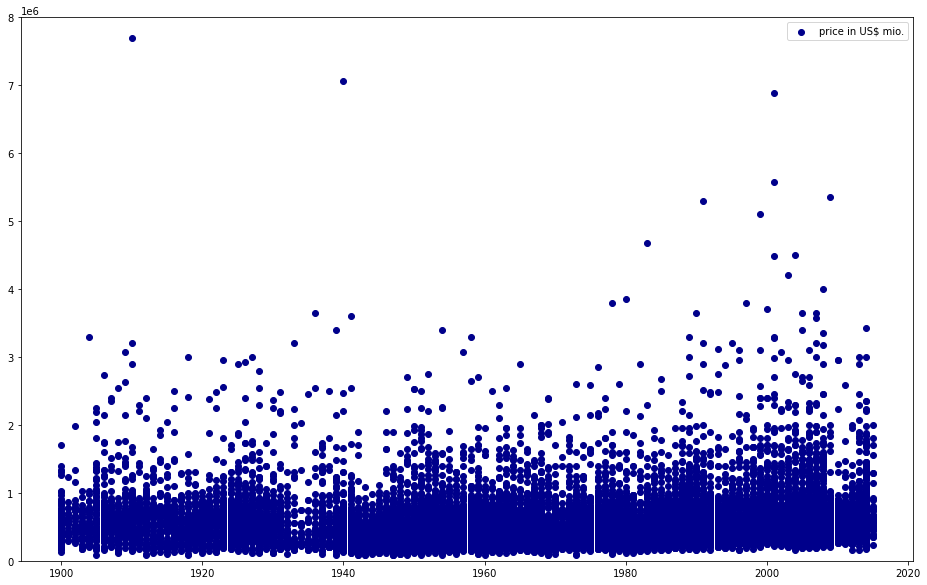

In [61]:
# matplotlib: barplot

plt.figure(figsize=(16,10))
plt.xticks(rotation = 0)
plt.xlabel=("year built")
plt.ylabel=("price in US$ mio.")
plt.title=("price range of our properties")
plt.ylim(0,8000000,5)

plt.scatter(x= houses['yr_built'], y=houses['price'], color='darkblue', label = 'price in US$ mio.')

plt.legend(loc='best')
plt.show()

In [62]:
houses.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean   4.580940e+09  5.407393e+05      3.373950      2.118429   2083.132633   
std    2.876761e+09  3.679311e+05      0.925405      0.768720    918.808412   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123537e+09  3.225000e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.142000e+04  21420.000000  19067.000000  21357.000000  21420.000000   
mean   1.512804e+04      1.495985      0.007657      0.234677      3.410784   
std    4.153080e+04      0.540081      0.087172      0.766459      0.650035   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.614000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069050e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...    sqft_above      yr_built  yr_renovated      zipcode  \
count  ...  21420.000000  21420.000000  17616.000000  21420.00000   
mean   ...   1791.170215   1971.092997     83.847241  98077.87437   
std    ...    828.692965     29.387141    400.436625     53.47748   
min    ...    370.000000   1900.000000      0.000000  98001.00000   
25%    ...   1200.000000   1952.000000      0.000000  98033.00000   
50%    ...   1560.000000   1975.000000      0.000000  98065.00000   
75%    ...   2220.000000   1997.000000      0.000000  98117.00000   
max    ...   9410.000000   2015.000000   2015.000000  98199.00000   

                lat          long  sqft_living15     sqft_lot15    living_sqm  \
count  21420.000000  21420.000000   21420.000000   21420.000000  21420.000000   
mean      47.560197   -122.213784    1988.384080   12775.718161    193.528151   
std        0.138589      0.140791     685.537057   27345.621867     85.362251   
min       47.155900   -122.519000     399.000000     651.000000     34.000000   
25%       47.471200   -122.328000    1490.000000    5100.000000    133.000000   
50%       47.572100   -122.230000    1840.000000    7620.000000    178.000000   
75%       47.678100   -122.125000    2370.000000   10086.250000    237.000000   
max       47.777600   -121.315000    6210.000000  871200.000000   1258.000000   

             lot_sqm  
count   21420.000000  
mean     1405.434687  
std      3858.302694  
min        48.000000  
25%       468.000000  
50%       707.000000  
75%       993.250000  
max    153415.000000  

[8 rows x 21 columns]

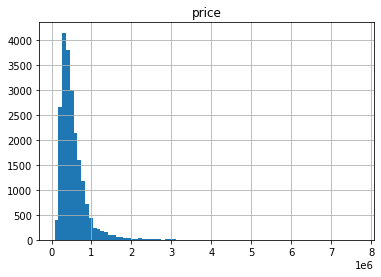

In [63]:
houses.hist(column='price', bins=80);

---

## __Get an understanding of the data with plots__

* created a pairplot if I have linear regressions in the data
* selected some of them to see if they fit and used `lmplot`:
    * sqft_living & price
    * sqft_living & grade
    * sqft_lot & price
    * condition & price
    * grade & price
    * yr_built & price

The selected ones are important for my stakeholder: yr_built, price, sqft_living
I am not sure if a filter for grade an condition is needed for this price range

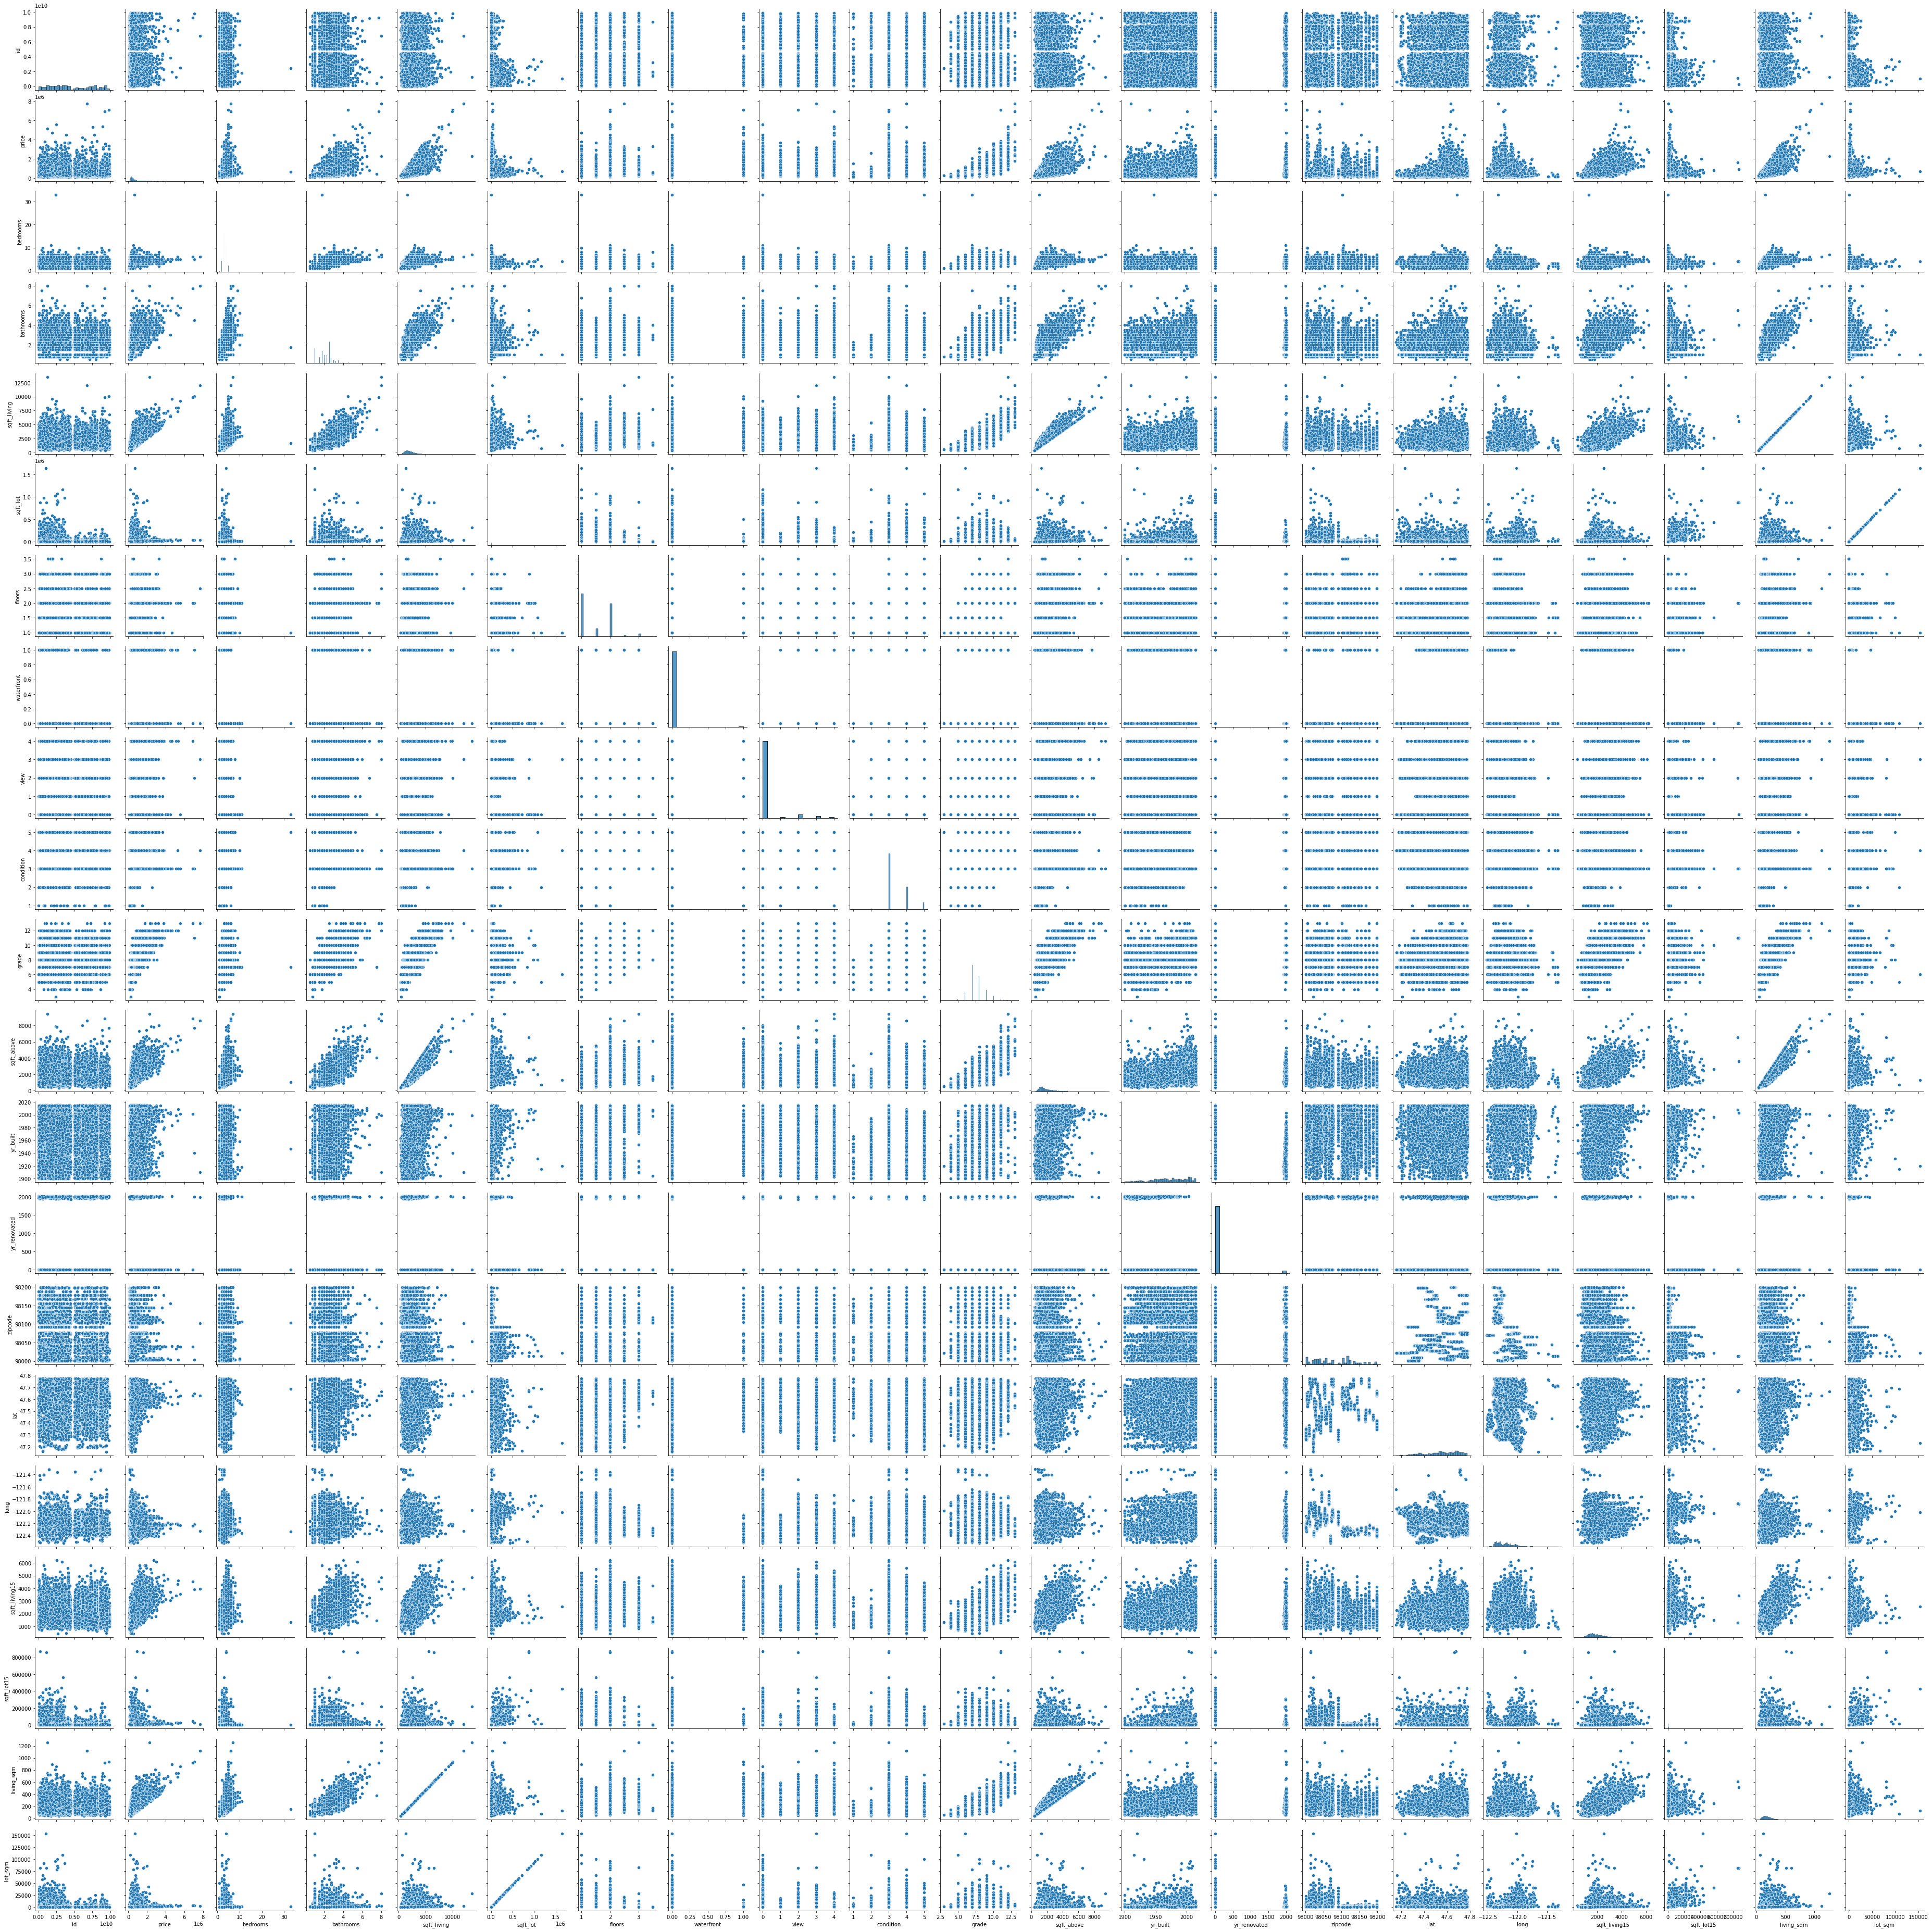

In [11]:
sns.pairplot(houses)

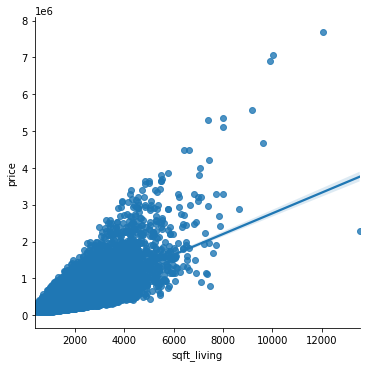

In [12]:
houses_sqliv_price=sns.lmplot(x='sqft_living', y='price', data=houses);

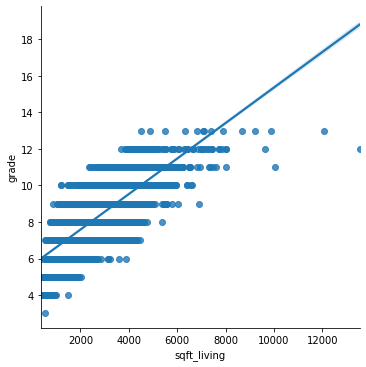

In [13]:
houses_sqliv_grade=sns.lmplot(x='sqft_living', y='grade', data=houses);

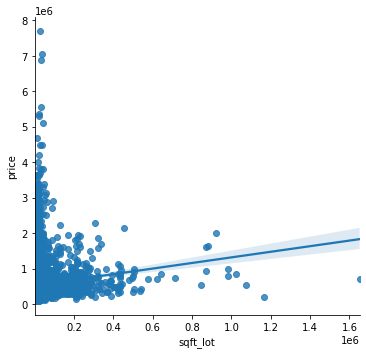

In [14]:
houses_sqlot_price=sns.lmplot(x='sqft_lot', y='price', data=houses);

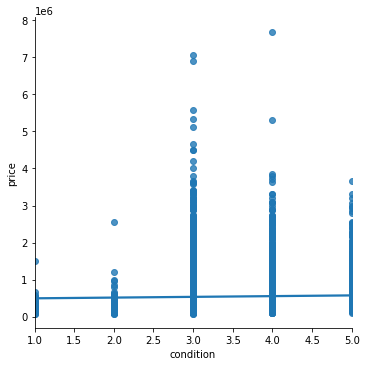

In [15]:
houses_cond_price=sns.lmplot(x='condition', y='price', data=houses);

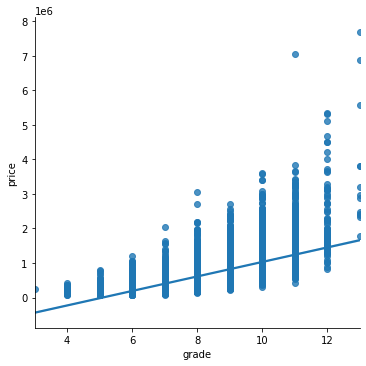

In [16]:
houses_grade_price=sns.lmplot(x='grade', y='price', data=houses);

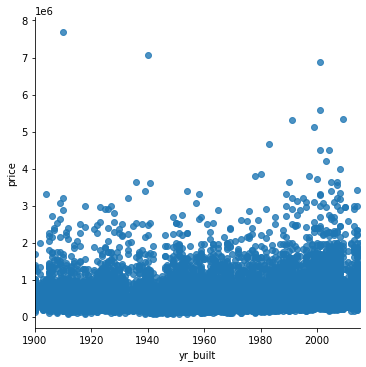

In [17]:
houses_yr_built_price=sns.lmplot(x='yr_built', y='price', data=houses);


---

## __Locations of all of our properties__

I create a map with plotly.express as a mapbox.

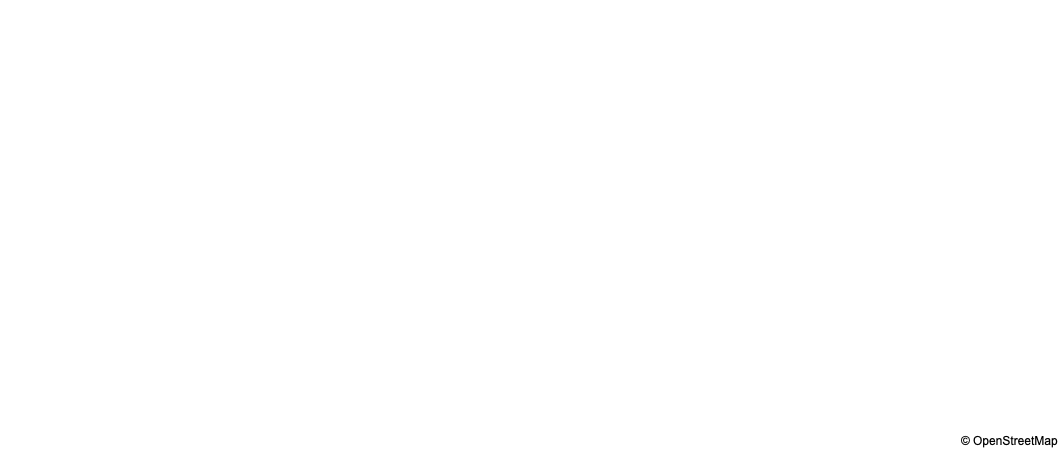

In [64]:
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

This map with all the KC properties was created with Kepler.gl.

![images/KC_all_properties.png](images/KC_all_properties.png)

---

## __Properties with a price of over US$ 1 mio.__

I created a map with Kepler and plotly as well. But the first step for plotly is to filter for all properties with a price of over and equal US$ 1 mio.

In [65]:
houses_high=houses.query('price >= 1000000')
houses_high

id        date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
49      822039084   3/11/2015  1350000.0         3       2.50         2753   
69     1802000060   6/12/2014  1330000.0         5       2.25         3200   
70     1525059190   9/12/2014  1040000.0         5       3.25         4770   
...           ...         ...        ...       ...        ...          ...   
21574  7430200100   5/14/2014  1220000.0         4       3.50         4910   
21577  8672200110   3/17/2015  1090000.0         5       3.75         4170   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   
21590  7936000429   3/26/2015  1010000.0         4       3.50         3510   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
5        101930     1.0         0.0   0.0  ...         1530.0      2001   
21        44867     1.0         0.0   4.0  ...          720.0      1968   
49        65005     1.0         1.0   2.0  ...          588.0      1953   
69        20158     1.0         0.0   0.0  ...         1600.0      1965   
70        50094     1.0         0.0   0.0  ...         1700.0      1973   
...         ...     ...         ...   ...  ...            ...       ...   
21574      9444     1.5         0.0   0.0  ...         1800.0      2007   
21577      8142     2.0         0.0   2.0  ...            0.0      2006   
21581     10125     2.0         0.0   0.0  ...              ?      2007   
21584      8088     2.0         0.0   0.0  ...            0.0      2008   
21590      7200     2.0         0.0   0.0  ...          910.0      2009   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
5               0.0   98053  47.6561 -122.005           4760      101930   
21              0.0   98040  47.5316 -122.233           4110       20336   
49              0.0   98070  47.4041 -122.451           2680       72513   
69              0.0   98004  47.6303 -122.215           3390       20158   
70              0.0   98005  47.6525 -122.160           3530       38917   
...             ...     ...      ...      ...            ...         ...   
21574           0.0   98074  47.6502 -122.066           4560       11063   
21577           NaN   98056  47.5354 -122.181           3030        7980   
21581           NaN   98040  47.5653 -122.223           2290       10125   
21584           0.0   98004  47.6321 -122.200           2780        8964   
21590           0.0   98136  47.5537 -122.398           2050        6200   

       living_sqm  lot_sqm  
5           504.0   9470.0  
21          283.0   4168.0  
49          256.0   6039.0  
69          297.0   1873.0  
70          443.0   4654.0  
...           ...      ...  
21574       456.0    877.0  
21577       387.0    756.0  
21581       317.0    941.0  
21584       415.0    751.0  
21590       326.0    669.0  

[1482 rows x 23 columns]

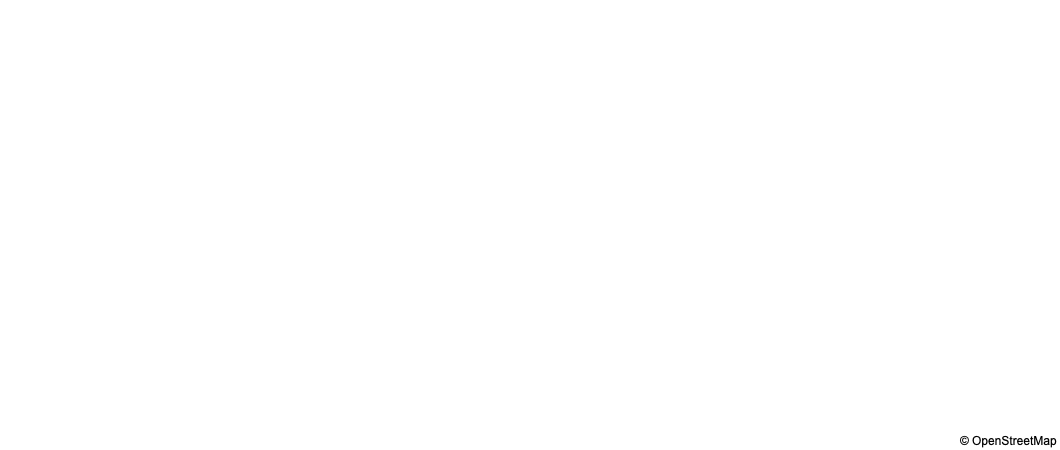

In [66]:
us_cities_high = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses_high, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

---

## __Filter with a query with 3 of the stakeholders's must-haves for his future home__

I added in the former query of houses with a price over US$ 1 mio. the 3 must-haves
* 4 or more bathrooms
* no waterfront - waterfront location is indicated with a 1 for True and a 0 for False. So I used waterfront < 1.0.
* a big lot in sqm (sqm_lot) with 
    * option 1: min 4,047 square meters (1 acre)
    * option 2: min 2,023 square meter (0.5 acre)

---

## __Option 1: lot size 1 acre__

* 4 or more bathrooms
* no waterfront
* a big lot in sqm: over or equal 1 acre = 43,560 square feet = 4,047 square meters

In [67]:
# option 1 with a lot size of 1 acre

houses_high_1a = houses_high.query('bathrooms >=4 and waterfront < 1.0 and lot_sqm>=4047')
houses_high_1a

id        date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
270    4054500390   10/7/2014  1370000.0         4       4.75         5310   
419    8678500060   7/10/2014  1550000.0         5       4.25         6070   
1169   1117200390    5/7/2014  1150000.0         4       4.00         4460   
3018   3377900195   9/29/2014  2530000.0         4       5.50         6930   
3098    622069006   8/20/2014  1500000.0         4       5.50         6550   
3704    822069112   4/23/2015  1350000.0         4       4.75         5230   
3867   2524049166   9/18/2014  2950000.0         5       4.75         6240   
5961   5249800010   12/3/2014  2730000.0         4       4.25         6410   
6495   2626069030    2/9/2015  1940000.0         4       5.75         7220   
9244    853600150   5/24/2014  1680000.0         4       4.25         5584   
9324   3324079089  11/21/2014  1340000.0         4       4.00         5050   
9366    226059096  11/18/2014  1570000.0         5       4.50         5220   
9594   1926069192    5/9/2014  1160000.0         4       4.25         5860   
10725  4054510310   12/1/2014  1040000.0         4       4.00         4090   
10939   853600310   8/28/2014  1610000.0         5       4.50         6085   
11093  4054530260   6/27/2014  1820000.0         4       4.50         6640   
11673  1126069045   6/20/2014  1140000.0         6       4.25         6900   
11968  3425069083   6/25/2014  1010000.0         4       4.50         4225   
12764  1225069038    5/5/2014  2280000.0         7       8.00        13540   
13110  2322069010   10/7/2014  1180000.0         5       5.00         3960   
13387  1524069044   10/9/2014  1820000.0         4       4.50         6380   
13390   524069020   4/22/2015  1050000.0         4       4.00         4550   
14542  2303900035   6/11/2014  2890000.0         5       6.25         8670   
14802  1525059261    5/5/2015  1900000.0         5       4.50         5160   
14885  2125059163    7/3/2014  1040000.0         4       5.00         4110   
14981  4054550010   4/13/2015  1640000.0         5       4.00         4780   
15152  3304700130   1/28/2015  1760000.0         4       4.00         3860   
15208  1424069069   5/22/2014  1150000.0         6       4.50         6040   
18412  4139900120    6/5/2014  1420000.0         4       5.25         4670   
18579  3023069166    7/8/2014  1140000.0         5       4.00         7320   
19842  2524069078   1/22/2015  2700000.0         4       4.00         7850   
20251  8835800010  12/23/2014  1040000.0         4       4.50         4920   
20436  1125079111   4/15/2015  1600000.0         4       5.50         6530   
20904  2124069115  10/21/2014  1830000.0         4       4.25         4500   
21328  8835770170   8/22/2014  1490000.0         5       6.00         6880   
21470    98300230   4/28/2015  1460000.0         4       4.00         4620   
21490  2524069097    5/9/2014  2240000.0         5       6.50         7270   
21504  7237550100   8/25/2014  1410000.0         4       4.00         4920   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
5        101930     1.0         0.0   0.0  ...         1530.0      2001   
270       57346     2.0         0.0   0.0  ...            0.0      1989   
419      171626     2.0         0.0   0.0  ...            0.0      1999   
1169     103382     2.0         0.0   0.0  ...            0.0      2001   
3018      45100     1.0         0.0   0.0  ...              ?      1950   
3098     217374     1.0         0.0   0.0  ...         1150.0      2006   
3704      89298     2.5         0.0   0.0  ...            0.0      2002   
3867      47480     1.0         0.0   3.0  ...         1630.0      2003   
5961      43838     2.5         0.0   2.0  ...          800.0      1906   
6495     223462     2.0         0.0   4.0  ...         1000.0      2000   
9244      68257     2.0         0.0   0.0  ...            0.0      19

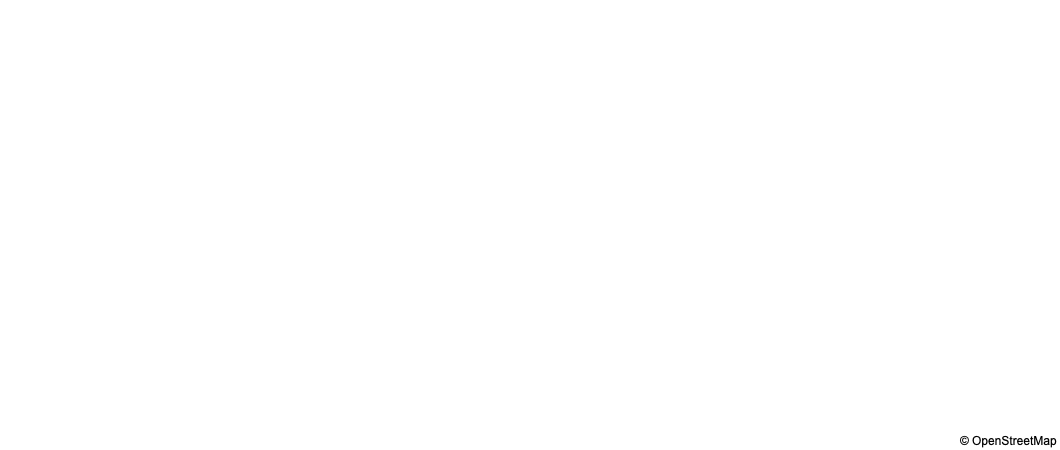

In [68]:
#option 1 map with plotly

us_cities_high_1a = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses_high_1a, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Option 1 map with Kepler

### __OPTION 1: Add the zipcode filter to only focus on the 10 suitable districts__

I used the zipcodes of the relevant districts. Some of the districts have the same zipcodes like
* Denny-Blaine and Madison Park
* Windermere and Laurelhurst
* Meydenbauer and North Bellevue

So there not 10 filtered overviews. After filtering the relevant properties I made an overview in a map.

In [69]:
##__Zipcodes of the 10 relevant districts:__ 
#Mercer Island = 98040, 
#Meydenbauer & North Bellevue = 98004 + 98005, 
#Downtown Kirkland = 98033 + 98034, 
#Briarcliff = 98199, 
#Windermere & Laurelhurst = 98105 + 98115, 
#Medina = 98039, 
#Denny-Blaine & Madison Park = 98112

houses_high_1a_q=houses_high.query('(zipcode ==98040 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode ==98004 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode==98005 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode == 98199 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode ==98105 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode==98115 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode ==98033 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode==98034 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode == 98112 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047) or (zipcode == 98039 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 4047)')
houses_high_1a_q

id       date      price  bedrooms  bathrooms  sqft_living  \
3867   2524049166  9/18/2014  2950000.0         5       4.75         6240   
14802  1525059261   5/5/2015  1900000.0         5       4.50         5160   
14885  2125059163   7/3/2014  1040000.0         4       5.00         4110   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
3867      47480     1.0         0.0   3.0  ...         1630.0      2003   
14802     44315     2.0         0.0   0.0  ...            0.0      1996   
14885     43560     2.0         0.0   0.0  ...            0.0      1978   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
3867            0.0   98040  47.5317 -122.233           4170       17668   
14802           0.0   98005  47.6568 -122.154           4760       44315   
14885           0.0   98005  47.6353 -122.180           3650       43995   

       living_sqm  lot_sqm  
3867        580.0   4411.0  
14802       479.0   4117.0  
14885       382.0   4047.0  

[3 rows x 23 columns]

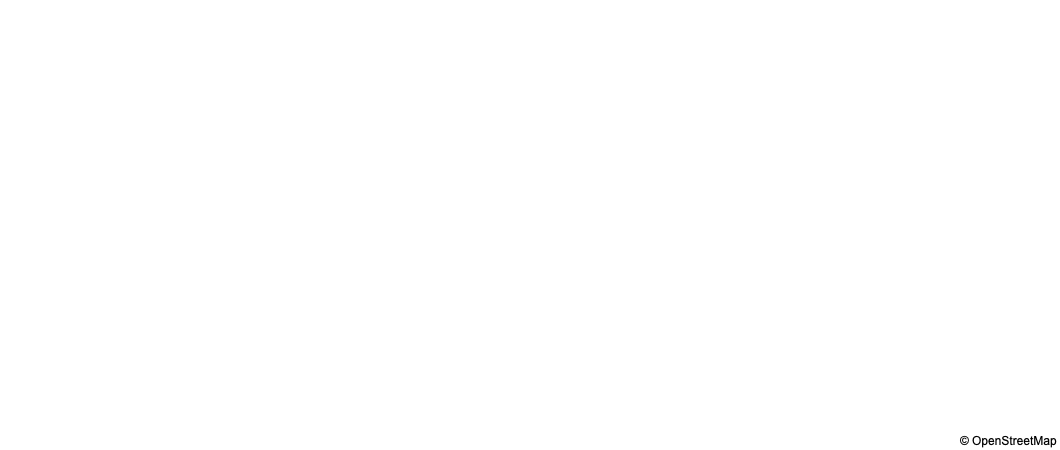

In [70]:
#option 1 filtered map with plotly

us_cities_high_1a_q = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses_high_1a_q, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### __OPTION 1: 3 results__

Two of the three filtered properties are not historic from my definition (1980 or 1960): Years of built are 1996 and 2003. 
The third and only suitable one was built in 1978.
So I will change the filter of the lot size.



---

## __Option 2: lot size 0.5 acre__

* 4 or more bathrooms
* no waterfront
* a big lot in sqm: over or equal 0.5 acre = 21,780 square feet = 2,023 square meters

In [71]:
# option 2 with a lot size of 0.5 acre

houses_high_05a = houses_high.query('bathrooms >=4 and waterfront < 1.0 and lot_sqm>=2023')
houses_high_05a

id       date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310  5/12/2014  1230000.0         4       4.50         5420   
235    1762600320  6/10/2014  1030000.0         5       4.00         3760   
270    4054500390  10/7/2014  1370000.0         4       4.75         5310   
419    8678500060  7/10/2014  1550000.0         5       4.25         6070   
450    4055700030   5/2/2015  1450000.0         3       4.50         3970   
...           ...        ...        ...       ...        ...          ...   
21328  8835770170  8/22/2014  1490000.0         5       6.00         6880   
21469  1088100450  7/25/2014  1720000.0         5       4.00         4590   
21470    98300230  4/28/2015  1460000.0         4       4.00         4620   
21490  2524069097   5/9/2014  2240000.0         5       6.50         7270   
21504  7237550100  8/25/2014  1410000.0         4       4.00         4920   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
5        101930     1.0         0.0   0.0  ...         1530.0      2001   
235       28040     2.0         0.0   0.0  ...            0.0      1983   
270       57346     2.0         0.0   0.0  ...            0.0      1989   
419      171626     2.0         0.0   0.0  ...            0.0      1999   
450       24920     2.0         0.0   2.0  ...          710.0      1977   
...         ...     ...         ...   ...  ...            ...       ...   
21328    279968     2.0         0.0   3.0  ...         2810.0      2007   
21469     35046     2.0         0.0   0.0  ...            0.0      2008   
21470    130208     2.0         0.0   0.0  ...            0.0      2014   
21490    130017     2.0         0.0   0.0  ...          850.0      2010   
21504     50621     2.0         0.0   0.0  ...          640.0      2012   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
5               0.0   98053  47.6561 -122.005           4760      101930   
235             0.0   98033  47.6489 -122.183           3430       35096   
270             NaN   98077  47.7285 -122.042           4180       47443   
419             0.0   98024  47.5954 -121.950           4680      211267   
450             NaN   98034  47.7183 -122.258           2610       13838   
...             ...     ...      ...      ...            ...         ...   
21328           0.0   98045  47.4624 -121.779           4690      256803   
21469           NaN   98033  47.6647 -122.160           3350       35857   
21470           0.0   98024  47.5885 -121.939           4620      131007   
21490           NaN   98027  47.5371 -121.982           1800       44890   
21504           0.0   98053  47.6575 -122.006           4920       74052   

       living_sqm  lot_sqm  
5           504.0   9470.0  
235         349.0   2605.0  
270         493.0   5328.0  
419         564.0  15944.0  
450         369.0   2315.0  
...           ...      ...  
21328       639.0  26010.0  
21469       426.0   3256.0  
21470       429.0  12097.0  
21490       675.0  12079.0  
21504       457.0   4703.0  

[69 rows x 23 columns]

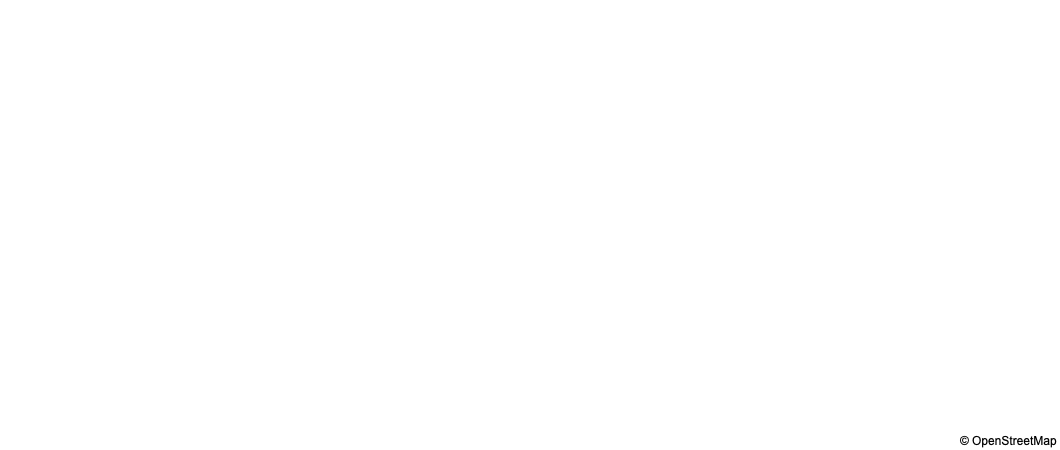

In [72]:
#option 2 map with plotly

us_cities_high_05a = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses_high_05a, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### __OPTION 2: Add the zipcode filter to only focus on the 10 suitable districts__

I used the zipcodes of the relevant districts. Some of the districts have the same zipcodes like
* Denny-Blaine and Madison Park
* Windermere and Laurelhurst
* Meydenbauer and North Bellevue

So there not 10 filtered overviews. After filtering the relevant properties I made an overview in a map.

In [73]:
#__Zipcodes of the 10 relevant districts:__ 
#Mercer Island = 98040, 
#Meydenbauer & North Bellevue = 98004 + 98005, 
#Downtown Kirkland = 98033 + 98034, 
#Briarcliff = 98199, 
#Windermere & Laurelhurst = 98105 + 98115, 
#Medina = 98039, 
#Denny-Blaine & Madison Park = 98112

houses_high_05a_q=houses_high.query('(zipcode ==98040 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode ==98004 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode==98005 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode == 98199 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode ==98105 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode==98115 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode ==98033 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode==98034 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode == 98112 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023) or (zipcode == 98039 and bathrooms >= 4 and waterfront < 1.0 and lot_sqm >= 2023)')
houses_high_05a_q

id        date      price  bedrooms  bathrooms  sqft_living  \
235    1762600320   6/10/2014  1030000.0         5       4.00         3760   
450    4055700030    5/2/2015  1450000.0         3       4.50         3970   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
3867   2524049166   9/18/2014  2950000.0         5       4.75         6240   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
7028    853200010    7/1/2014  3800000.0         5       5.50         7050   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
12271  1923000260  10/15/2014  1960000.0         5       4.50         6200   
12565  2806300065   4/22/2015  1960000.0         4       4.00         4430   
14172  1333300145    3/4/2015  2230000.0         3       4.00         4200   
14802  1525059261    5/5/2015  1900000.0         5       4.50         5160   
14885  2125059163    7/3/2014  1040000.0         4       5.00         4110   
14926  3627800050   7/15/2014  1380000.0         5       4.00         3760   
15008  2210500010   9/30/2014  2450000.0         7       4.25         4670   
16955  3025059093   7/29/2014  3100000.0         5       5.25         5090   
18314  5317100750   7/11/2014  2920000.0         4       4.75         4575   
21469  1088100450   7/25/2014  1720000.0         5       4.00         4590   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
235       28040     2.0         0.0   0.0  ...            0.0      1983   
450       24920     2.0         0.0   2.0  ...          710.0      1977   
1446      23985     2.0         0.0   4.0  ...         1280.0      2009   
3867      47480     1.0         0.0   3.0  ...         1630.0      2003   
4407      35069     2.0         0.0   0.0  ...         3000.0      2001   
7028      42840     1.0         0.0   2.0  ...         2730.0      1978   
9245      31374     2.0         0.0   4.0  ...         1030.0      2001   
12271     23373     3.0         0.0   1.0  ...         1150.0      1988   
12565     31353     2.0         0.0   0.0  ...            0.0      1998   
14172     30120     2.0         0.0   2.0  ...          600.0      1933   
14802     44315     2.0         0.0   0.0  ...            0.0      1996   
14885     43560     2.0         0.0   0.0  ...            0.0      1978   
14926     22763     1.0         0.0   3.0  ...         1850.0      1969   
15008     23115     2.0         0.0   2.0  ...            0.0      1992   
16955     23669     2.0         0.0   0.0  ...            0.0      2006   
18314     24085     2.5         0.0   2.0  ...          670.0      1926   
21469     35046     2.0         0.0   0.0  ...            0.0      2008   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
235             0.0   98033  47.6489 -122.183           3430       35096   
450             NaN   98034  47.7183 -122.258           2610       13838   
1446            0.0   98004  47.6232 -122.220           4600       21750   
3867            0.0   98040  47.5317 -122.233           4170       17668   
4407            NaN   98039  47.6289 -122.233           3560       24345   
7028            0.0   98004  47.6229 -122.220           5070       20570   
9245            0.0   98039  47.6305 -122.240           4540       42730   
12271           0.0   98040  47.5632 -122.215           3700       14486   
12565           0.0   98005  47.6422 -122.157           3900       35237   
14172           0.0   98112  47.6379 -122.311           2760       12200   
14802           0.0   98005  47.6568 -122.154           4760       44315   
14885           0.0   98005  47.6353 -122.180           3650       43995   
14926           0.0   98040  47.5333 -122.220           3730       11201   
15008           0.0   98039  47.6183 -122.227           3240       13912   
16955           0.0   98004  47.6297 -122.216           3830       22605   
18314           0.0   98112  47.6263 -122.2

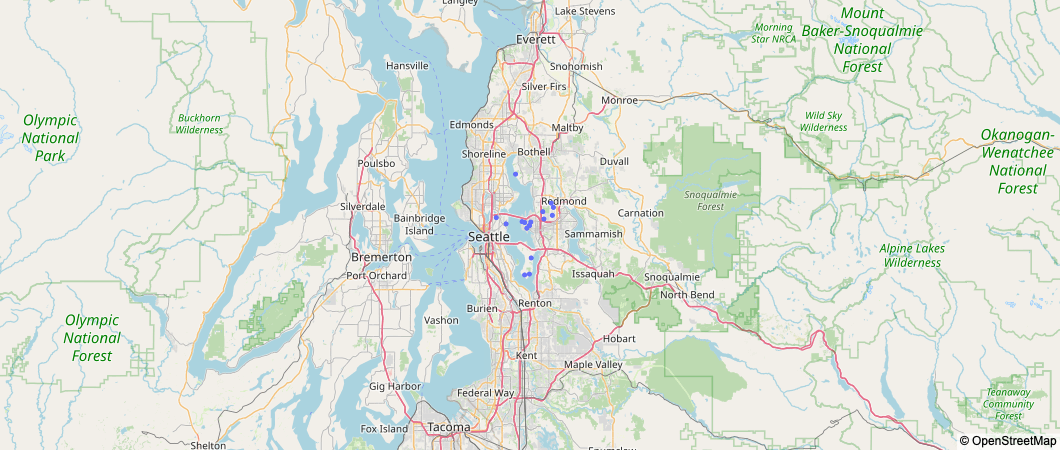

In [74]:
#option 2 filtered map with plotly

us_cities_high_05a_q = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses_high_05a_q, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### __OPTION 2: 17 results__

Now I will filter for houses built before and in 1980. Next step is to filter to before and in 1960.

In [75]:
houses_high_05a_1980=houses_high_05a_q.query('yr_built <= 1980')
houses_high_05a_1980

id       date      price  bedrooms  bathrooms  sqft_living  \
450    4055700030   5/2/2015  1450000.0         3       4.50         3970   
7028    853200010   7/1/2014  3800000.0         5       5.50         7050   
14172  1333300145   3/4/2015  2230000.0         3       4.00         4200   
14885  2125059163   7/3/2014  1040000.0         4       5.00         4110   
14926  3627800050  7/15/2014  1380000.0         5       4.00         3760   
18314  5317100750  7/11/2014  2920000.0         4       4.75         4575   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
450       24920     2.0         0.0   2.0  ...          710.0      1977   
7028      42840     1.0         0.0   2.0  ...         2730.0      1978   
14172     30120     2.0         0.0   2.0  ...          600.0      1933   
14885     43560     2.0         0.0   0.0  ...            0.0      1978   
14926     22763     1.0         0.0   3.0  ...         1850.0      1969   
18314     24085     2.5         0.0   2.0  ...          670.0      1926   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
450             NaN   98034  47.7183 -122.258           2610       13838   
7028            0.0   98004  47.6229 -122.220           5070       20570   
14172           0.0   98112  47.6379 -122.311           2760       12200   
14885           0.0   98005  47.6353 -122.180           3650       43995   
14926           0.0   98040  47.5333 -122.220           3730       11201   
18314           0.0   98112  47.6263 -122.284           3900        9687   

       living_sqm  lot_sqm  
450         369.0   2315.0  
7028        655.0   3980.0  
14172       390.0   2798.0  
14885       382.0   4047.0  
14926       349.0   2115.0  
18314       425.0   2238.0  

[6 rows x 23 columns]

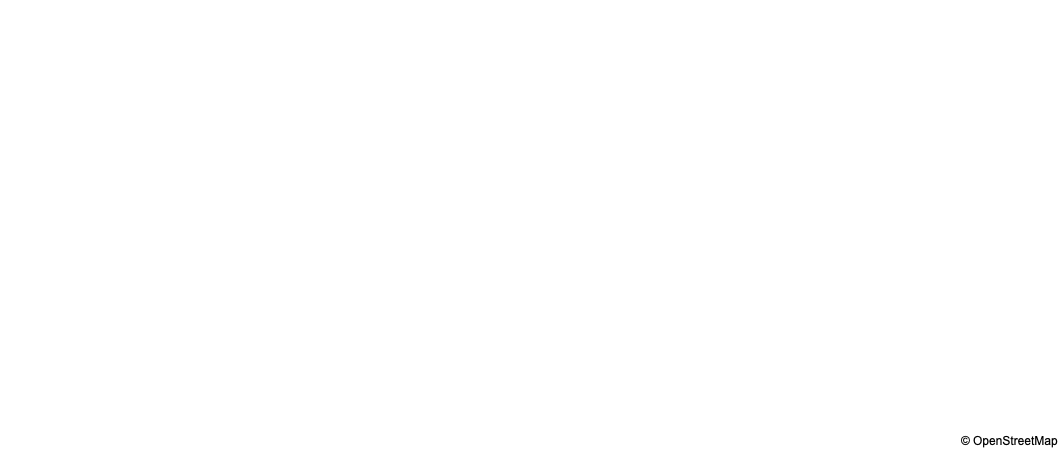

In [76]:
#option 2 filtered (yr_built <= 1980) map with plotly

us_cities_high_05a_1980 = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses_high_05a_1980, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [77]:
houses_high_05a_1960=houses_high_05a_q.query('yr_built <= 1960')
houses_high_05a_1960

id       date      price  bedrooms  bathrooms  sqft_living  \
14172  1333300145   3/4/2015  2230000.0         3       4.00         4200   
18314  5317100750  7/11/2014  2920000.0         4       4.75         4575   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
14172     30120     2.0         0.0   2.0  ...          600.0      1933   
18314     24085     2.5         0.0   2.0  ...          670.0      1926   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
14172           0.0   98112  47.6379 -122.311           2760       12200   
18314           0.0   98112  47.6263 -122.284           3900        9687   

       living_sqm  lot_sqm  
14172       390.0   2798.0  
18314       425.0   2238.0  

[2 rows x 23 columns]

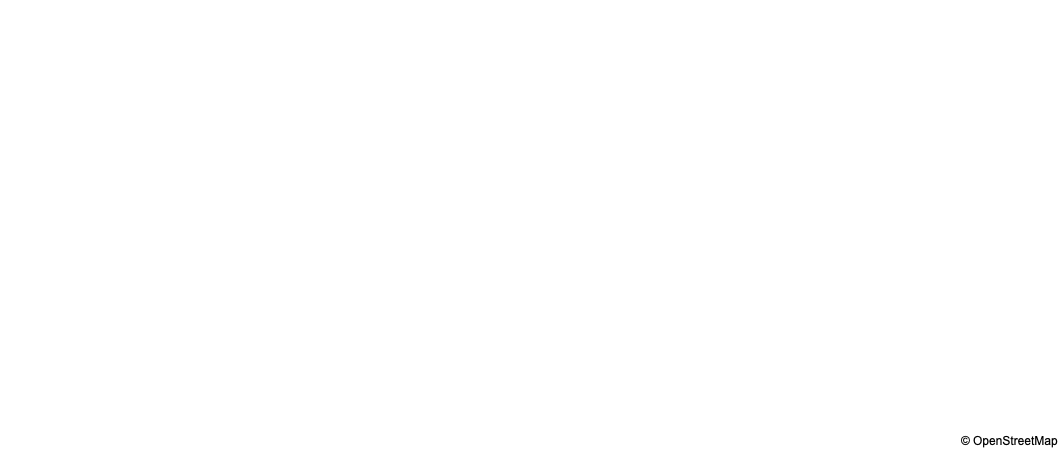

In [78]:
#option 2 filtered (yr_built <= 1960) map with plotly

us_cities_high_05a_1960 = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

fig = px.scatter_mapbox(houses_high_05a_1960, lat="lat", lon="long")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

---

## __OPTION 2: results__

* 2 results for houses built before and in 1960 
* 6 results for houses built before and in 1980

In [83]:
houses_high_05a_1960.loc[:,['id','zipcode','price', 'yr_built', 'bathrooms', 'bedrooms','sqft_lot', 'sqft_living','lot_sqm','living_sqm', 'condition', 'grade']].sort_values('zipcode')

id  zipcode      price  yr_built  bathrooms  bedrooms  \
14172  1333300145    98112  2230000.0      1933       4.00         3   
18314  5317100750    98112  2920000.0      1926       4.75         4   

       sqft_lot  sqft_living  lot_sqm  living_sqm  condition  grade  
14172     30120         4200   2798.0       390.0          4     11  
18314     24085         4575   2238.0       425.0          5     10

In [84]:
houses_high_05a_1980.loc[:,['id','zipcode','price', 'yr_built', 'bathrooms', 'bedrooms','sqft_lot', 'sqft_living','lot_sqm','living_sqm', 'condition', 'grade']].sort_values('zipcode')

id  zipcode      price  yr_built  bathrooms  bedrooms  \
7028    853200010    98004  3800000.0      1978       5.50         5   
14885  2125059163    98005  1040000.0      1978       5.00         4   
450    4055700030    98034  1450000.0      1977       4.50         3   
14926  3627800050    98040  1380000.0      1969       4.00         5   
14172  1333300145    98112  2230000.0      1933       4.00         3   
18314  5317100750    98112  2920000.0      1926       4.75         4   

       sqft_lot  sqft_living  lot_sqm  living_sqm  condition  grade  
7028      42840         7050   3980.0       655.0          4     13  
14885     43560         4110   4047.0       382.0          4     11  
450       24920         3970   2315.0       369.0          3     10  
14926     22763         3760   2115.0       349.0          4     11  
14172     30120         4200   2798.0       390.0          4     11  
18314     24085         4575   2238.0       425.0          5     10

---

## __Recommendations for my Stakeholder Jacob Phillips__

#### __A-level recommendations__

* 2 houses in Meydenbauer & North-Bellevue (zipcode 98004/98005):
    * Both were built in 1978, are in good condition (4) and have a grade of min 11 (13 is best). The grade is based on King County grading system (13 is best, 1 worst).
    * id 853 200 010 has a price of US$ 3.8 mio. | 5.5 bathrooms | 5 bedrooms | lot size of 42,840 sqft (3,980 sqm) and a living size of 7,050 sqft (655 sqm)
    * id 212 505 91 63 has a price of US$ 1.04 mio. | 5 bathrooms | 4 bedrooms | lot size of 43,560 sqft (4,047 sqm) and a living size of 4,110 sqft (382 sqm)
* 1 house on Mercer Island (zipcode 98040):
    * The house was built in 1969, is in good condition (4) and has a grade of 11.
    * id 362 780 00 50 has a price of US$ 1.38 mio. | 4 bathrooms | 5 bedrooms | lot size of 22,763 sqft (2,115 sqm) and a living size of 3,760 sqft (349 sqm).
* 2 houses in Denny-Blaine & Madison Park (zipcode 98112):
    * id 133 330 01 45 was built in 1933, is in good condition (4) and has a grade of 11. 
    * This house has a price of US$  2.23 mio. | 4 bathrooms | 3 bedrooms | lot size of 30,120 sqft (2,798 sqm) and a living size of 4,200 sqft (390 sqm).

    * id 531 710 07 50 was built in 1926, is in best condition (5) and has a grade of 10. 
    * This house has a price of US$  2.92 mio. | 4.75 bathrooms | 4 bedrooms | lot size of 24,085 sqft (2,238 sqm) and a living size of 4,575 sqft (425 sqm).


#### __B-level__

* 1 house in Downtown Kirkland (zipcode 98034):
    * The house was built in 1977, is in medium condition (3) and has a grade of 10.
    * id 405 570 00 30 has a price of US$ 1.45 mio. | 4.5 bathrooms | 3 bedrooms | lot size of 24,920 sqft (2,315 sqm) and a living size of 3,970 sqft (369 sqm).


#### __summary__

* oldest house: id 531 710 07 50 (1926)
* biggest lot: id 212 505 91 63 (43,560 sqft (4,047 sqm))
* biggest living: id 853 200 010 (7,050 sqft (655 sqm))
* most bathrooms: id 853 200 010 (5.5 bathrooms)
* best grade: id 853 200 010 (13)
* best condition: id 531 710 07 50 (5)
* most expensive: id 853 200 010 (US$ 3.8 mio.)